In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import datetime as dt
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
import numpy as np

In [ ]:
# Importing Data from csv file
mushroomDF = pd.read_csv('C:/Users/ankur/Downloads/Kaggle Notebooks/mushrooms.csv')
mushroomDF.head()

In [ ]:
mushroomDF.shape

# Data Pre-Processing

In [ ]:
# Check if there are any null values in dataset
mushroomDF.isnull().sum()

In [ ]:
mushroomDF.dtypes

In [ ]:
mushroomDF['class'].unique()

In [ ]:
mushroomDF.dtypes

In [ ]:
csmap = {'x' : 0, 'b' : 1, 's' : 2, 'f' : 3, 'k' : 4, 'c' : 5}
mushroomDF['cap-shape'] = mushroomDF['cap-shape'].map(csmap)

In [ ]:
allMapping = [{'p':0, 'e':1}, 
              {'x' : 0, 'b' : 1, 's' : 2, 'f' : 3, 'k' : 4, 'c' : 5},
              {'s':0, 'y':1, 'f':2, 'g':3},
              {'n':0, 'y':1, 'w':2, 'g':3, 'e':4, 'p':5, 'b':6, 'u':7, 'c':8, 'r':9},
              {'t':0, 'f':1},
              {'p':0, 'a':1, 'l':2, 'n':3, 'f':4, 'c':5, 'y':6, 's':7, 'm':8},
              {'f':0, 'a':1},
              {'c':0, 'w':1},
              {'n':0, 'b':1},
              {'k':0, 'n':1, 'g':2, 'p':3, 'w':4, 'h':5, 'u':6, 'e':7, 'b':8, 'r':9, 'y':10, 'o':11},
              {'e':0, 't':1},
              {'e':0, 'c':1, 'b':2, 'r':3, '?':4},
              {'s':0, 'f':1, 'k':2, 'y':3},
              {'s':0, 'f':1, 'k':2, 'y':3},
              {'w':0, 'g':1, 'p':2, 'n':3, 'b':4, 'e':5, 'o':6, 'c':7, 'y':8},
              {'w':0, 'p':1, 'g':2, 'b':3, 'n':4, 'e':5, 'y':6, 'o':7, 'c':8},
              {'p':0},
              {'w':0, 'n':1, 'o':2, 'y':3},
              {'o':0, 't':1, 'n':2},
              {'p':0, 'e':1, 'l':2, 'f':3, 'n':4},
              {'k':0, 'n':1, 'u':2, 'h':3, 'w':4, 'r':5, 'o':6, 'y':7, 'b':8},
              {'s':0, 'n':1, 'a':2, 'v':3, 'y':4, 'c':5},
              {'u':0, 'g':1, 'm':2, 'd':3, 'p':4, 'w':5, 'l':6}
    
]

In [ ]:
len(allMapping)

In [ ]:
allMapping[1]

In [ ]:
#Replacing categorical values with numeric values
for i in range(0,len(mushroomDF.columns)):
    #print(mushroomDF.columns[i])
    mushroomDF[mushroomDF.columns[i]] =  mushroomDF[mushroomDF.columns[i]].map(allMapping[i]).astype(int)

In [ ]:
y = mushroomDF['class'].values
X = mushroomDF.drop('class', axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [ ]:
mushroomDF.head()

In [ ]:
mushroomDF.dtypes

In [ ]:
# Targte variable is class
y = mushroomDF['class']
X = mushroomDF.drop('class', axis =1 )

In [ ]:
# spliting test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Feature Selection

## 1. Univariate Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(score_func=chi2, k=20)#.fit_transform(X, y)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

# 2. Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## 3. Correlation Matrix

In [ ]:
corrmat = mushroomDF.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(mushroomDF[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Plotting for data visualization

In [ ]:
plt.figure(figsize=(10,5))
sns.set_color_codes(palette="colorblind")
sns.distplot(X_train['bruises'],color='g')
plt.show()

# Plotting Continous variable

In [ ]:
sb.distplot(X_train['odor'],kde = False)
plt.show()
# This shows that more than 2600 mushrooms has odor 3

In [ ]:
sb.distplot(X_train['habitat'],kde = False)
plt.show()
# This shows that more than 2600 mushrooms habitat is 3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
plt.hist(X_train['cap-color','cap-surface','cap-shape'], bins = 100,color = 'blue', edgecolor = 'black')
plt.set_title('Histogram For Cap Related Data')
plt.set_xlabel('Cap', size = 22)
plt.set_ylabel('Total', size= 22)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(x = "class", hue =  "odor", data = mushroomDF, palette = "CMRmap")
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
sns.set(style="darkgrid")
g = sns.catplot(x= "odor", y = "class", hue = "habitat" , data = mushroomDF, kind = 'bar' ,palette= "YlOrRd_r")
g.despine(left = True)
g.set_ylabels("Survived Probability")

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_lst = []
# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

# Random Forest Regression 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=254)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

# Decision Tree

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy

from sklearn import tree

dtf = tree.DecisionTreeClassifier()

dtf.fit(X_train,y_train)

prediction = dtf.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, prediction)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Decision Tree algorithm] accuracy_score: {:.3f}.".format(acc))

# SVM : SImple Kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("[SVM algorithm] accuracy_score: {:.3f}.",acc)

# SVM : Polynomial Kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("[SVM algorithm With Polynomial Kernel] accuracy_score: {:.3f}.",acc)

# SVM : Gaussian Kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("[SVM algorithm With Gaussian Kernel] accuracy_score: {:.3f}.",acc)

# SVM : Sigmoid Kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("[SVM algorithm With Sigmoid Kernel] accuracy_score: {:.3f}.",acc)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y1, X1 = np.meshgrid(y, x)
    xy = np.vstack([X1.ravel(), Y1.ravel()]).T
    P = model.decision_function(xy).reshape(X1.shape)
    
    # plot decision boundary and margins
    ax.contour(X1, Y1, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [ ]:

plt.scatter(X1[:, 0], X1[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svclassifier);


In [ ]:
X.head()

# ANN Algorithm

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
# Sigmoid Function

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [ ]:
# seed random numbers to make calculation
# deterministic (just a good practice)

np.random.seed(1)
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((22,1)) - 1

#syn1 = 2*np.random.random((6499,1)) - 1
print(syn0)

In [ ]:
#np.dot(X_train.T,syn0)
#X_train.T
syn0.shape
#x = np.dot(l0.T,syn0)
#b = 1/(1+np.exp(-x))
#l1_error = y_train - l1
##l1Delta1 =  nonlin(l1,True)
#l1Delta2 = l1_error * l1Delta1
print(l1_error.shape)
print(l1Delta1.shape)
print(l1Delta2.shape)
print(syn0.shape)
print(l0.shape)


In [ ]:
y_train = y_train.reshape((6499,1))
for j in range(60000):
    l0 = X_train
    l1 = nonlin(np.dot(l0,syn0))
    l1_error = y_train - l1
    l1_delta = l1_error * nonlin(l1,True)
    syn0 += np.dot(l0.T,l1_delta)
print("Output After Training:")
print(l1)

In [ ]:
f  = np.dot(l0,l1_delta)
f.shape

In [ ]:
print(l0.shape)
print(l1_delta.shape)
print(l1Delta.shape)


In [ ]:
#y_train = y_train.values
print(l1_error.shape)
print(l0.shape)
print(l1_delta.shape)

In [ ]:

X_train = np.reshape(np.array(X_train),(6499,22))
syn0 = np.reshape(np.array(syn0),(6499,1))
print(X_train)

In [ ]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,1,1,0]]).T
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
for j in range(60000):
    l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    l2_delta = (y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)

In [ ]:
# Confusion MAtrix
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test, y_pred, labels = [0,1])

# Building Neural Network

# NEW ANN MODEL

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [362]:
mushroomDF = pd.read_csv('C:/Users/ankur/Downloads/Kaggle Notebooks/mushrooms.csv')
mushroomDF.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [366]:
# Integer Encoding of all columns in dataset
for column in mushroomDF.columns:
    mushroomDF[column] = le.fit_transform(mushroomDF[column])

In [367]:
mushroomDF.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [368]:
y = mushroomDF['class'].values
X = mushroomDF.drop('class', axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [369]:
# Creating ANN Model
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense# Neural network
model = Sequential()
model.add(Dense(16, kernel_initializer = 'uniform', input_dim=22, activation= 'relu'))
model.add(Dense(16, kernel_initializer = 'uniform', activation= 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation= 'sigmoid'))
#Specify loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [370]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=70, batch_size=16)

Train on 6499 samples, validate on 1625 samples
Epoch 1/70
6499/6499 [==============================] - 5s 696us/step - loss: 0.3955 - acc: 0.8434 - val_loss: 0.2415 - val_acc: 0.9071
Epoch 2/70
6499/6499 [==============================] - 1s 225us/step - loss: 0.2082 - acc: 0.9289 - val_loss: 0.1801 - val_acc: 0.9391
Epoch 3/70
6499/6499 [==============================] - 2s 233us/step - loss: 0.1600 - acc: 0.9455 - val_loss: 0.1447 - val_acc: 0.9372
Epoch 4/70
6499/6499 [==============================] - 2s 232us/step - loss: 0.1195 - acc: 0.9591 - val_loss: 0.0985 - val_acc: 0.9655
Epoch 5/70
6499/6499 [==============================] - 2s 256us/step - loss: 0.0805 - acc: 0.9746 - val_loss: 0.0674 - val_acc: 0.9791
Epoch 6/70
6499/6499 [==============================] - 2s 256us/step - loss: 0.0594 - acc: 0.9815 - val_loss: 0.0498 - val_acc: 0.9871
Epoch 7/70
6499/6499 [==============================] - 2s 253us/step - loss: 0.0446 - acc: 0.9888 - val_loss: 0.0376 - val_acc: 0.9926


Epoch 60/70
6499/6499 [==============================] - 1s 152us/step - loss: 3.4868e-04 - acc: 1.0000 - val_loss: 5.9331e-04 - val_acc: 1.0000
Epoch 61/70
6499/6499 [==============================] - 1s 140us/step - loss: 0.0025 - acc: 0.9995 - val_loss: 9.1728e-04 - val_acc: 1.0000
Epoch 62/70
6499/6499 [==============================] - 1s 150us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 1.6870e-04 - val_acc: 1.0000
Epoch 63/70
6499/6499 [==============================] - 1s 124us/step - loss: 2.8180e-04 - acc: 1.0000 - val_loss: 1.2150e-04 - val_acc: 1.0000
Epoch 64/70
6499/6499 [==============================] - 1s 125us/step - loss: 2.2751e-04 - acc: 1.0000 - val_loss: 1.1288e-04 - val_acc: 1.0000
Epoch 65/70
6499/6499 [==============================] - 1s 144us/step - loss: 2.1212e-04 - acc: 1.0000 - val_loss: 9.0914e-05 - val_acc: 1.0000
Epoch 66/70
6499/6499 [==============================] - 1s 155us/step - loss: 8.7065e-04 - acc: 1.0000 - val_loss: 1.1288e-04 - val_acc: 

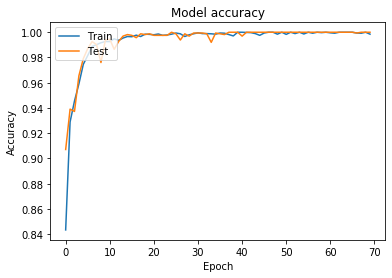

In [371]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

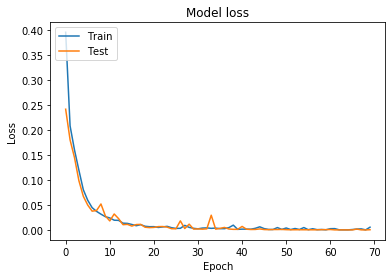

In [372]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [375]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

In [376]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))

[[842   0]
 [  0 783]]


In [377]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Neural Network Testing With Hyperparameter Tuning

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

In [46]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
mushroomDF = pd.read_csv('C:/Users/ankur/Downloads/Kaggle Notebooks/mushrooms.csv')
mushroomDF.head()
# Integer Encoding of all columns in dataset
for column in mushroomDF.columns:
    mushroomDF[column] = le.fit_transform(mushroomDF[column])
y = mushroomDF['class'].values
X = mushroomDF.drop('class', axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [48]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            print(i,nodes)
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

In [49]:
model

In [50]:
print(X_train.shape)
print(y_train.shape)

(6499, 22)
(6499,)


In [51]:
layers = [[20], [40, 20], [45, 30, 15]]
# This means we will have 
#one hidden layers with 20 neuron,
# then it will have 2 layer with 40 neuron in 1st layer and 2nd layer will have 20 layer
# three layers with 45 neuron

activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [52]:
grid_result = grid.fit(X_train, y_train)

C:\Users\ankur\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [53]:
[grid_result.best_score_,grid_result.best_params_]

[0.9102938915421586,
 {'activation': 'sigmoid', 'batch_size': 128, 'epochs': 30, 'layers': [20]}]

In [54]:
pred_y = grid.predict(X_test)

In [55]:
y_pred = (pred_y > 0.5)

In [56]:
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [58]:
cm

array([[812,  30],
       [ 97, 686]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.9218461538461539